### Creating a logistic regression based on the bank data provided using sklearn module

##### 1.The data is based on the marketing campaign efforts of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).
##### 2. The first column of the dataset is the index.

### Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set()

### Loading the data

In [3]:
raw_data=pd.read_csv('Example-bank-data.csv')
raw_data

,Unnamed: 0,duration,y
0,0,117,no
1,1,274,yes
2,2,167,no
3,3,686,yes
4,4,157,no
...,...,...,...
513,513,204,no
514,514,806,yes
515,515,290,no
516,516,473,yes


In [4]:
bank_data=raw_data.copy()
bank_data=bank_data.drop(['Unnamed: 0'],axis=1)
# Mapping the data as 'yes' to 1 and 'no' to 0
bank_data['y']=bank_data['y'].map({'yes':1,'no':0})
bank_data.head()

,duration,y
0,117,0
1,274,1
2,167,0
3,686,1
4,157,0


In [5]:
# Printing the descriptive summary of the given dataset
bank_data.describe(include='all')

,duration,y
count,518.000000,518.000000
mean,382.177606,0.500000
std,344.295990,0.500483
min,9.000000,0.000000
25%,155.000000,0.000000
50%,266.500000,0.500000
75%,482.750000,1.000000
max,2653.000000,1.000000


### Declaring the dependent and independent variables

In [6]:
y=bank_data['y']
x1=bank_data['duration']

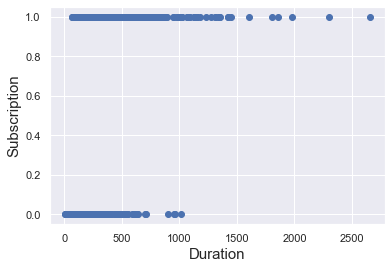

In [7]:
# Exploring the data with scatter plot
plt.scatter(x1,y,color='C0')
plt.xlabel('Duration',fontsize=15)
plt.ylabel('Subscription',fontsize=15)
plt.show()

### Logistic Regression

In [8]:
x=sm.add_constant(x1)
reg_log=sm.Logit(y,x)
result=reg_log.fit()

Optimization terminated successfully.
         Current function value: 0.546118
         Iterations 7


In [9]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  518
Model:                          Logit   Df Residuals:                      516
Method:                           MLE   Df Model:                            1
Date:                Wed, 20 Oct 2021   Pseudo R-squ.:                  0.2121
Time:                        10:25:13   Log-Likelihood:                -282.89
converged:                       True   LL-Null:                       -359.05
Covariance Type:            nonrobust   LLR p-value:                 5.387e-35
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.7001      0.192     -8.863      0.000      -2.076      -1.324
duration       0.0051      0.001      9.159      0.000       0.004       0.006
==============================================================================
"""

###### 1.The dependent variable is 'duration'. The model used is a Logit regression (logistic in common lingo), while the method - Maximum Likelihood Estimation (MLE). It has clearly converged after classifyin 518 observations.
###### 2.The Pseudo R-squared is 0.21 which is within the 'acceptable region'.
###### 3. The duration variable is significant and its coefficient is 0.0051.
###### 4. The constant is also significant and equals: -1.70

### Plot the Logistic Regression Curve

In [10]:
def f(x,b0,b1):
    return np.array(np.exp(b0+b1*x)/(1+np.exp(b0+b1*x)))
f_sorted=np.sort(f(x1,result.params[0],result.params[1]))
x_sorted=np.sort(np.array(x1))

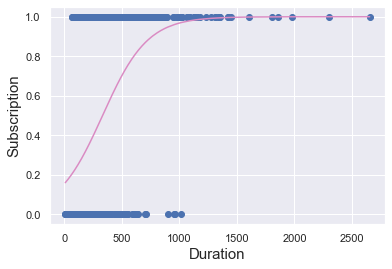

In [11]:
plt.scatter(x1,y,color='C0')
plt.xlabel('Duration',fontsize=15)
plt.ylabel('Subscription',fontsize=15)
plt.plot(x_sorted,f_sorted,color='C6')
plt.show()